In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


def plot_image(image, title="Image"):
    if isinstance(image, bytes):
        image = np.frombuffer(image, np.uint8)
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap="gray" if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis("off")
    plt.show()

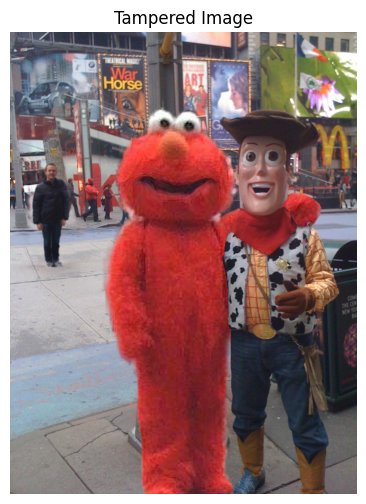

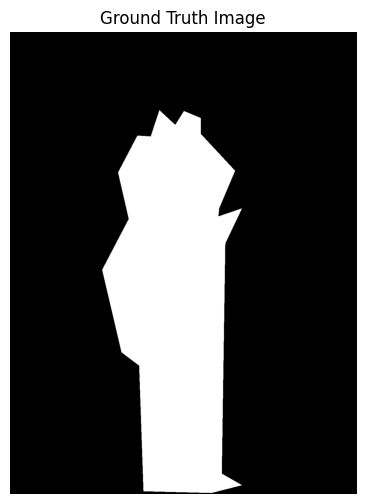

In [6]:
img_folder = "/home/nhat82125/ForgeryX-Server/example"
img_name = "im1_edit3"

tp_img = cv2.imread(os.path.join(img_folder, f"{img_name}.jpg"))
gt_img = cv2.imread(os.path.join(img_folder, f"{img_name}.png"))

plot_image(tp_img, "Tampered Image")
plot_image(gt_img, "Ground Truth Image")

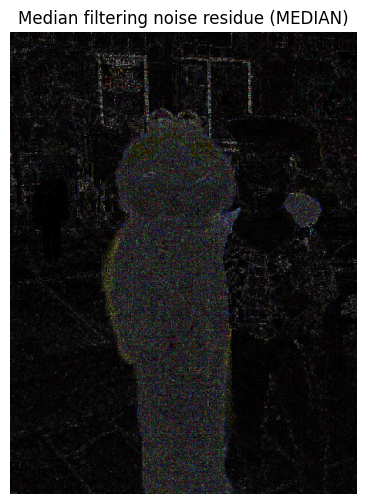

In [11]:
median_filtered = cv2.medianBlur(tp_img, 3)
noise = cv2.absdiff(tp_img, median_filtered)
norm_noise = np.clip(noise * 10, 0, 255).astype(np.uint8)

display_surface_temp = norm_noise if len(
    norm_noise.shape) == 2 else cv2.cvtColor(norm_noise, cv2.COLOR_BGR2RGB)

sc_width, sc_height = 600, 600
h, w = display_surface_temp.shape[:2]

if h > w and h > sc_height:
    sc_width = (sc_height * w) // h
    display_surface = cv2.resize(display_surface_temp, (sc_width, sc_height))
elif w > h and w > sc_width:
    sc_height = (sc_width * h) // w
    display_surface = cv2.resize(display_surface_temp, (sc_width, sc_height))
else:
    display_surface = display_surface_temp

plot_image(display_surface, "Median filtering noise residue (MEDIAN)")